In [2]:
import os
os.chdir("/home/zkim/outdoor_navigation/semantic-segmentation")
os.getcwd()

'/home/zkim/outdoor_navigation/semantic-segmentation'

In [3]:
from PIL import Image
from torchvision import io
from semseg.augmentations import *

In [4]:
def show_images(image1, image2):
    images = torch.cat([image1, image2], dim=2)
    images = Image.fromarray(images.permute(1, 2, 0).numpy())
    return images

def show_image_labels(image, label, img, lbl):
    images = torch.cat([image, img], dim=2)
    labels = torch.cat([label, lbl], dim=2)
    image_labels = torch.cat([images, labels], dim=1)
    image_labels = Image.fromarray(image_labels.permute(1, 2, 0).numpy())
    return image_labels

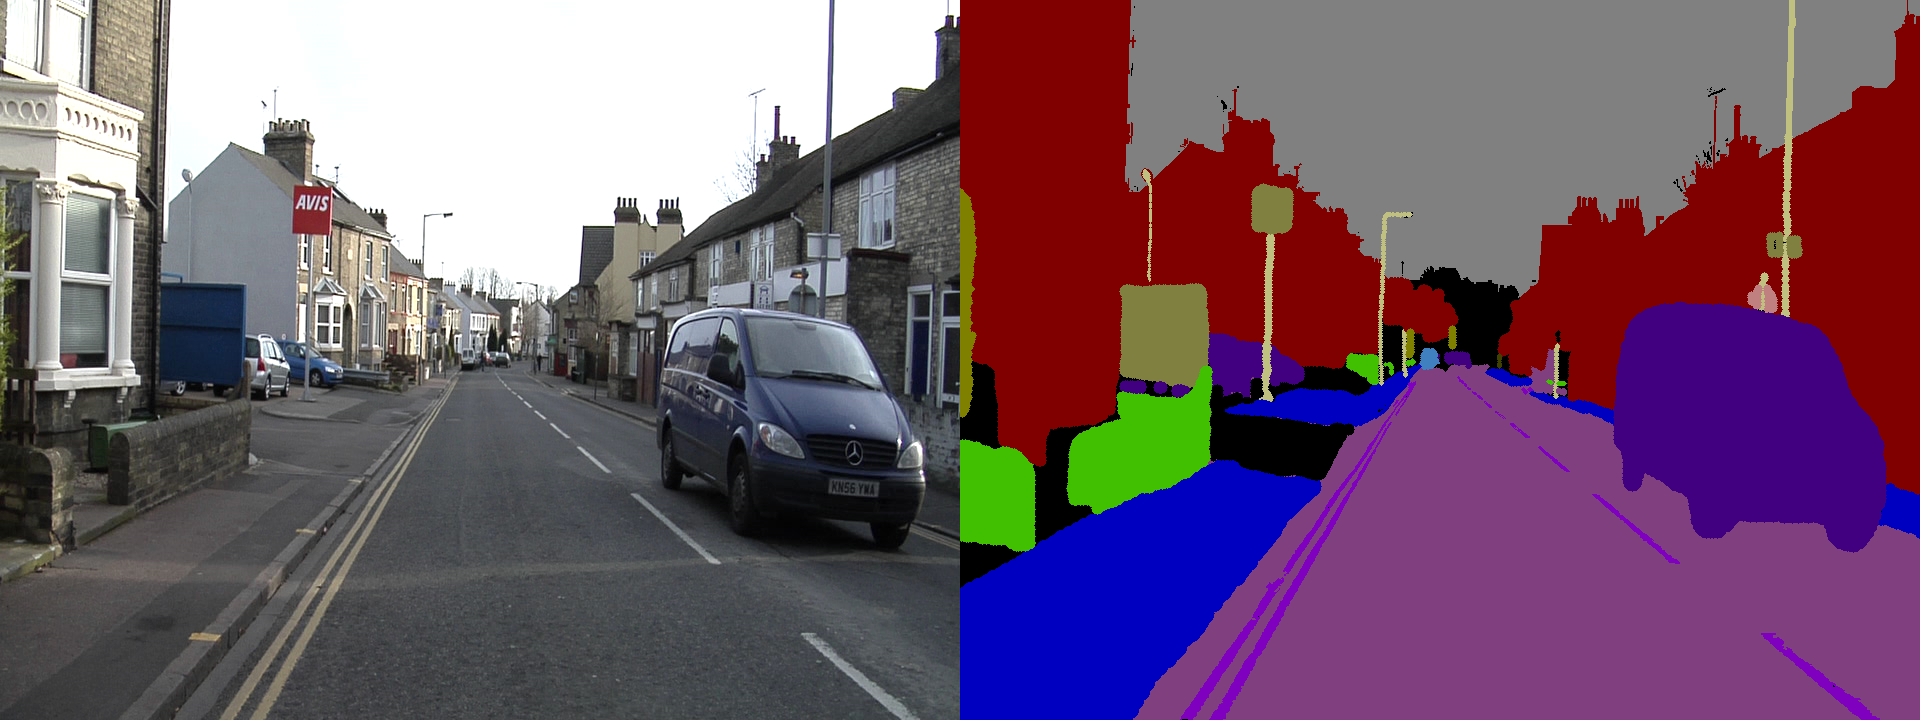

In [6]:
img_path = './assests/image_labels/Seq05VD_f05100.png'
label_path = './assests/image_labels/Seq05VD_f05100_L.png'
image = io.read_image(img_path)
label = io.read_image(label_path)
show_images(image, label)

# Pixel-level Transforms

## ColorJitter

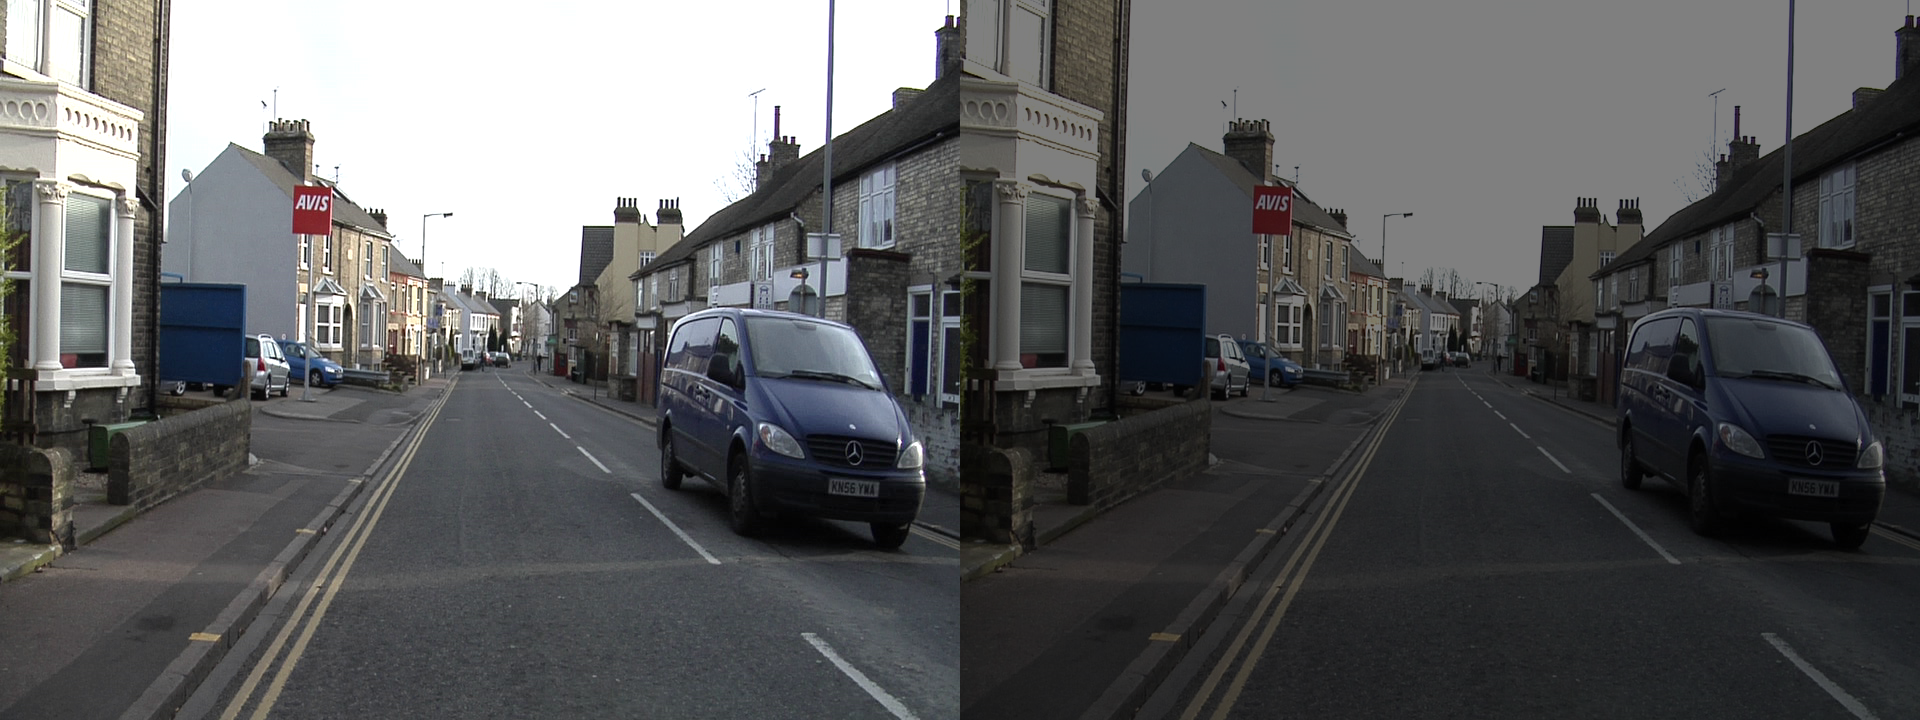

In [7]:
img, lbl = ColorJitter(brightness=0.5)(image, label)
show_images(image, img)

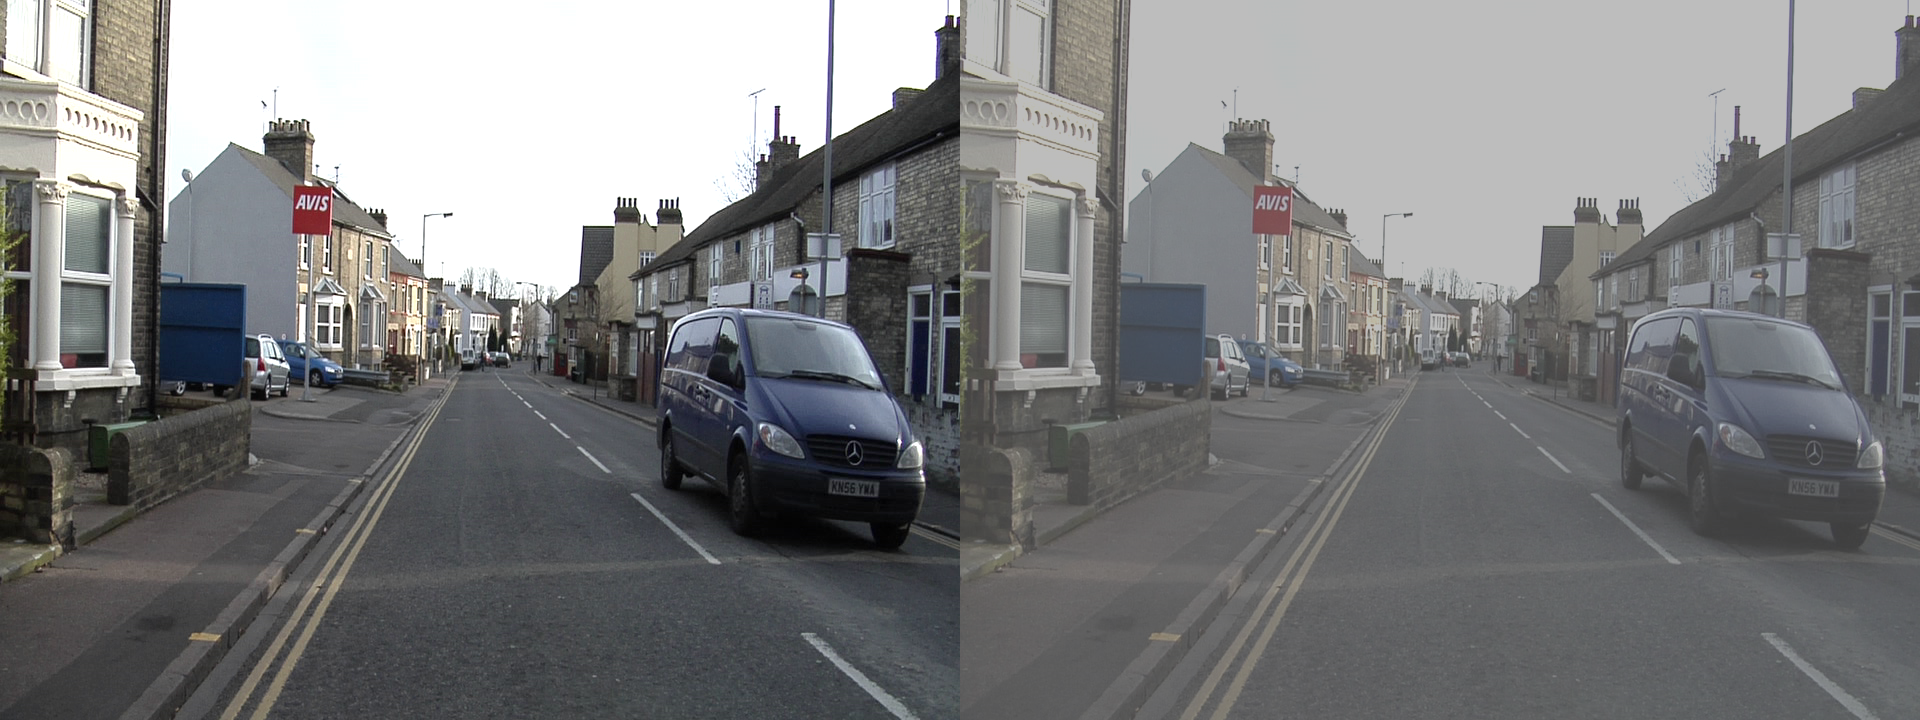

In [8]:
img, lbl = ColorJitter(contrast=0.5)(image, label)
show_images(image, img)

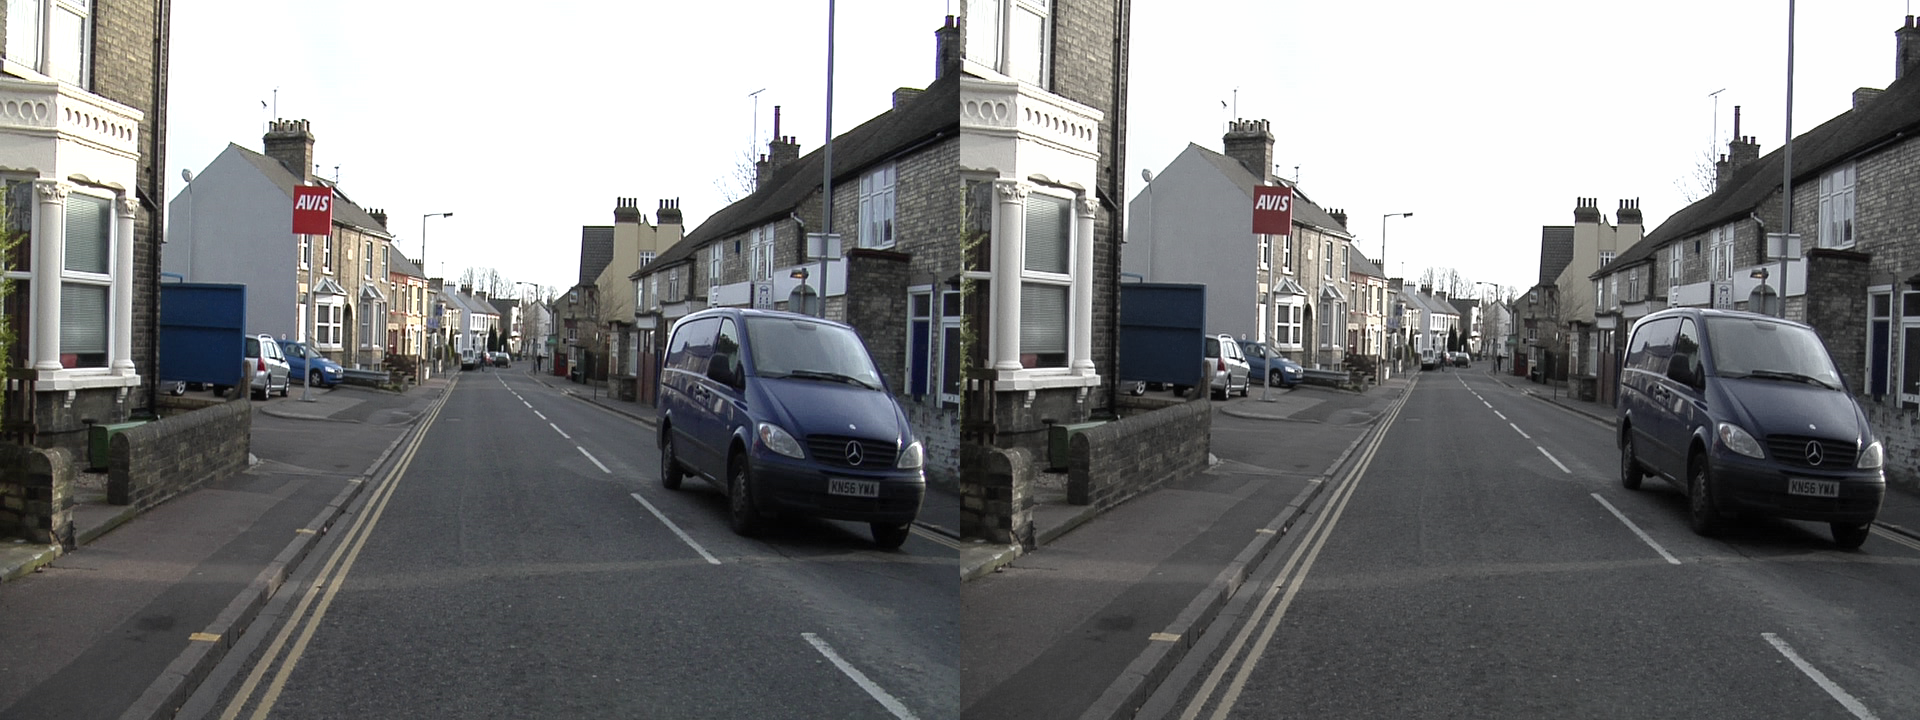

In [9]:
img, lbl = ColorJitter(saturation=0.5)(image, label)
show_images(image, img)

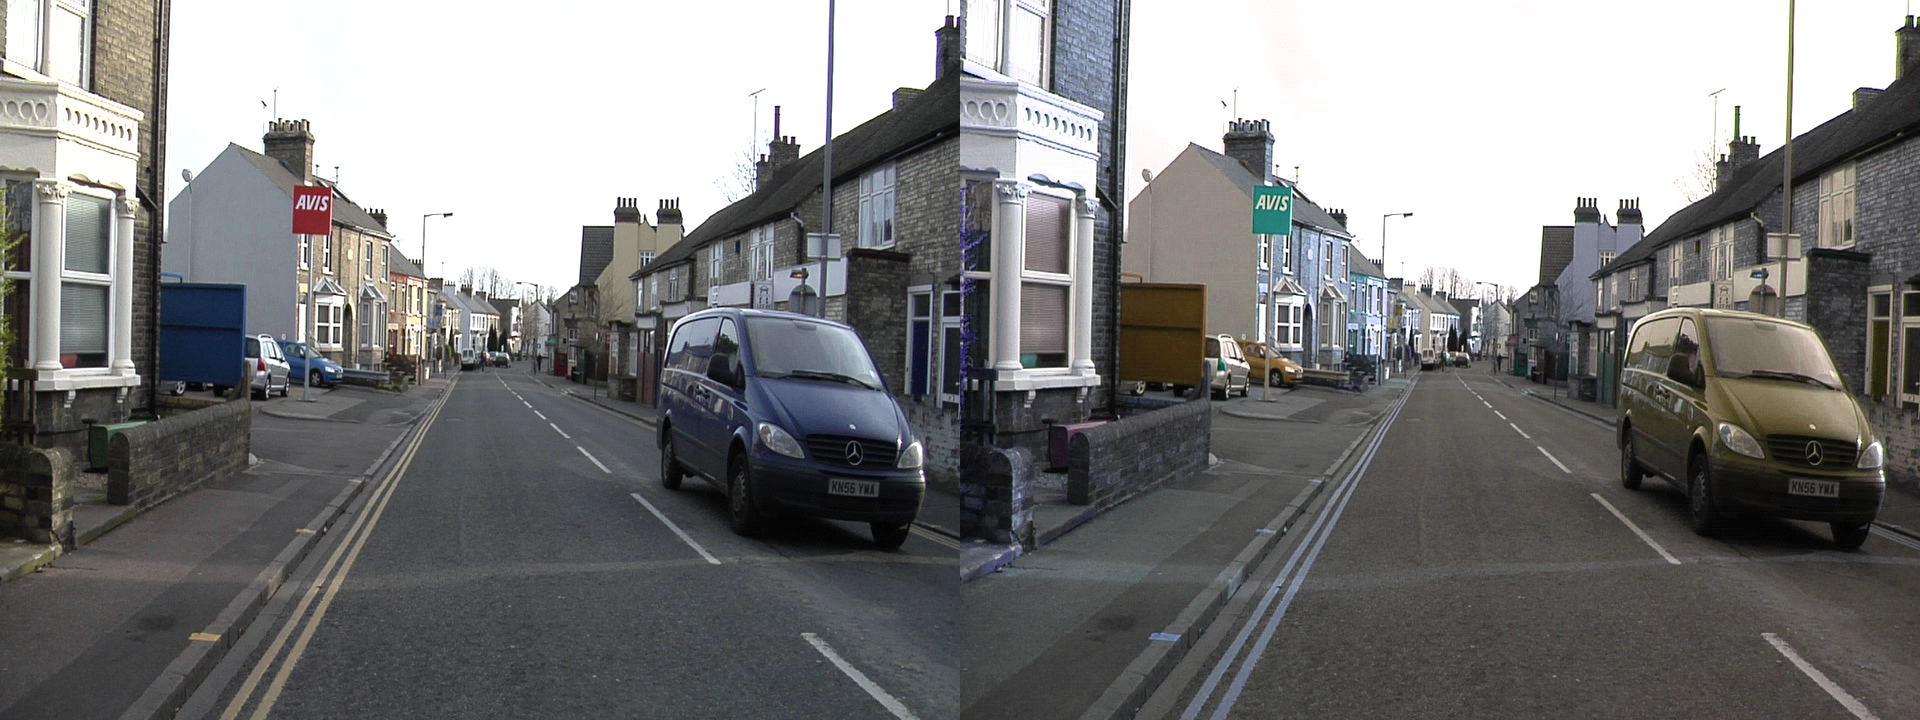

In [10]:
img, lbl = ColorJitter(hue=0.5)(image, label)
show_images(image, img)

## AdjustGamma

In [ ]:
img, lbl = AdjustGamma(gamma=0.5, gain=1)(image, label)
show_images(image, img)

## AdjustSharpness

In [ ]:
img, lbl = RandomAdjustSharpness(10, p=1.0)(image, label)
show_images(image, img)

## AutoContrast

In [ ]:
img, lbl = RandomAutoContrast(p=1.0)(image, label)
show_images(image, img)

## GaussianBlur

In [ ]:
img, lbl = RandomGaussianBlur(5, p=1.0)(image, label)
show_images(image, img)

## Grayscale

In [ ]:
# channel size remains to 3 instead of 1
img, lbl = RandomGrayscale(p=1.0)(image, label)
show_images(image, img)

## Equalize

In [ ]:
img, lbl = Equalize()(image, label)
show_images(image, img)

## Posterize

In [ ]:
img, lbl = Posterize(1)(image, label)
show_images(image, img)

In [ ]:
img, lbl = Posterize(7)(image, label)
show_images(image, img)

# Spatial-level Transforms

## Affine

In [ ]:
img, lbl = Affine(angle=10)(image, label)
show_image_labels(image, label, img, lbl)

In [ ]:
img, lbl = Affine(translate=[30, 10])(image, label)
show_image_labels(image, label, img, lbl)

In [ ]:
img, lbl = Affine(scale=0.5)(image, label)
show_image_labels(image, label, img, lbl)

In [ ]:
img, lbl = Affine(scale=2.0)(image, label)
show_image_labels(image, label, img, lbl)

In [ ]:
img, lbl = Affine(shear=[-10, 10])(image, label)
show_image_labels(image, label, img, lbl)

## HorizontalFlip

In [ ]:
img, lbl = RandomHorizontalFlip(p=1.0)(image, label)
show_image_labels(image, label, img, lbl)

## VerticalFlip

In [ ]:
img, lbl = RandomVerticalFlip(p=1.0)(image, label)
show_image_labels(image, label, img, lbl)

## RandomRotation

In [ ]:
img, lbl = RandomRotation(30, p=1.0, seg_fill=0)(image, label)
show_image_labels(image, label, img, lbl)

## CenterCrop

In [ ]:
img, lbl = CenterCrop((320, 320))(image, label)
show_images(image, label)   # original 

In [ ]:
show_images(img, lbl)  # center crop to (320, 320)

## RandomCrop

Crop at random location. (Like a zoom-in effect)

In [ ]:
img, lbl = RandomCrop((320, 320), p=1.0)(image, label)
print(image.shape, label.shape)
show_images(image, label)   # original 

In [ ]:
print(img.shape, lbl.shape)
show_images(img, lbl)

## Pad

Pad the image to given size.

In [ ]:
img, lbl = Pad((1024, 1024), seg_fill=0)(image, label)
print(image.shape, label.shape)
show_images(image, label)   # original 

In [ ]:
print(img.shape, lbl.shape)
show_images(img, lbl)

In [ ]:
# if pad output size is less than original, then crop the image start from the corner
# not the same as RandomCrop; which will crop at random location instead of from the corner
img, lbl = Pad((480, 640), seg_fill=0)(image, label)
print(img.shape, lbl.shape)
show_images(img, lbl)   

## ResizePad

Nearly the same as Pad but uses resize instead of crop in **Pad**.

In [ ]:
img, lbl = ResizePad((1024, 1024), seg_fill=0)(image, label)
print(image.shape, label.shape)
show_images(image, label)   # original 

In [ ]:
print(img.shape, lbl.shape)
show_images(img, lbl)

In [ ]:
img, lbl = ResizePad((480, 640), seg_fill=0)(image, label)
print(img.shape, lbl.shape)
show_images(img, lbl)   

## Resize

Resize the shortest image size to the target size while maintaing the aspect ratio. And also make it divisible by stride 32. 

Notes: This will make the image sizes not equal; which is not suitable to use in training.

In [ ]:
img, lbl = Resize((512, 512))(image, label)
print(image.shape, label.shape)
show_images(image, label)   # original 

In [ ]:
# as u can see, the other side is not 512 but maintains the aspect ratio
print(img.shape, lbl.shape)
show_images(img, lbl)

In [ ]:
img, lbl = Resize((1024, 1024))(image, label)
print(img.shape, lbl.shape)
show_images(img, lbl)  

## RandomResizedCrop

Combination of **RandomCrop** and **ResizePad**.

In [ ]:
img, lbl = RandomResizedCrop((512, 512), (0.5, 2.0), seg_fill=0)(image, label)
print(image.shape, label.shape)
show_images(image, label)   # original 

In [ ]:
# as u can see, the other side is not 512 but maintains the aspect ratio
print(img.shape, lbl.shape)
show_images(img, lbl)

In [ ]:
img, lbl = RandomResizedCrop((1024, 1024), (0.5, 2.0), seg_fill=0)(image, label)
print(img.shape, lbl.shape)
show_images(img, lbl)   

In [ ]:
img, lbl = RandomResizedCrop((1024, 1024), (0.5, 2.0), seg_fill=0)(image, label)
print(img.shape, lbl.shape)
show_images(img, lbl)    

In [ ]:
img, lbl = RandomResizedCrop((1024, 1024), (0.5, 2.0), seg_fill=0)(image, label)
print(img.shape, lbl.shape)
show_images(img, lbl)   